In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
x = torch.unsqueeze(torch.linspace(-1 , 1, 100), dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

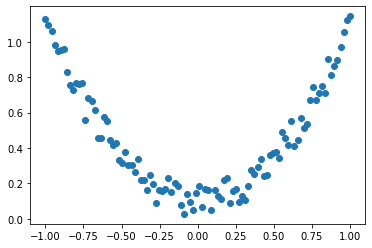

In [3]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    


In [7]:
net1 = Net(1, 10, 1)
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1),
)
print(net1, net2)
net = net2

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

In [9]:
for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    loss.backward()
    optimizer.step()
    
    if t%5 == 0:
        print(loss)

tensor(0.7230, grad_fn=<MseLossBackward>)
tensor(0.1017, grad_fn=<MseLossBackward>)
tensor(0.1476, grad_fn=<MseLossBackward>)
tensor(0.3119, grad_fn=<MseLossBackward>)
tensor(0.3008, grad_fn=<MseLossBackward>)
tensor(0.0817, grad_fn=<MseLossBackward>)
tensor(0.1225, grad_fn=<MseLossBackward>)
tensor(0.2529, grad_fn=<MseLossBackward>)
tensor(0.3598, grad_fn=<MseLossBackward>)
tensor(0.3129, grad_fn=<MseLossBackward>)
tensor(0.1922, grad_fn=<MseLossBackward>)
tensor(0.0462, grad_fn=<MseLossBackward>)
tensor(0.1993, grad_fn=<MseLossBackward>)
tensor(0.3226, grad_fn=<MseLossBackward>)
tensor(0.1563, grad_fn=<MseLossBackward>)
tensor(0.0766, grad_fn=<MseLossBackward>)
tensor(0.2556, grad_fn=<MseLossBackward>)
tensor(0.3112, grad_fn=<MseLossBackward>)
tensor(0.1261, grad_fn=<MseLossBackward>)
tensor(0.0945, grad_fn=<MseLossBackward>)
